# Project A - Association analysis

Consider each invoice as a transaction in the dataset ‘D1.csv’ and build an association mining model on this dataset to identify what are the common items that customers have purchased. The task is to conduct Association mining on this data set.

Answer the following questions concerning this data and analysis.

1. What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice.

Conduct association mining and answer the following:
    
    2. What ‘min_support’ and 'min_confidence' thresholds were set for this mining exercise? What is the rationale for why these values were chosen?
    3. Report the top-5 rules and interpret them.

4. Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.
5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.
6. How can the outcome of this study be used by the relevant decision-makers?

**1. What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice**

In [9]:
import pandas as pd

# load the bank transaction dataset
df = pd.read_csv('D1.csv')

# Data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    19663 non-null  int64  
 1   StockCode    19663 non-null  object 
 2   Description  19075 non-null  object 
 3   Quantity     19663 non-null  int64  
 4   InvoiceDate  19663 non-null  object 
 5   UnitPrice    19663 non-null  float64
 6   CustomerID   15678 non-null  float64
 7   Country      19663 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ MB
None


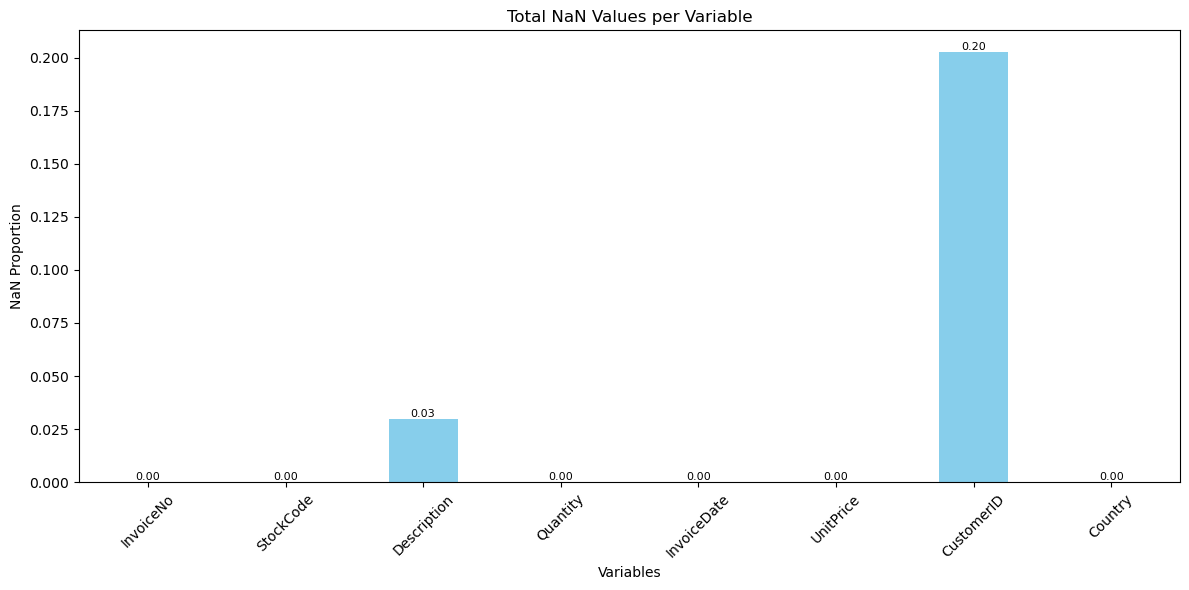

In [4]:
import matplotlib.pyplot as plt 

nan_counts = df.isna().sum()/19663

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Proportion')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Assuming df is your DataFrame
df['Description'].fillna("MISSING", inplace=True)

# Group by StockCode and collect unique descriptions along with their counts
stock_code_counts = df.groupby('StockCode')['Description'].agg(['unique', 'count'])

# Sort the DataFrame by the 'count' column in descending order
stock_code_counts = stock_code_counts.sort_values(by='count', ascending=False)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full output with unique descriptions and their counts, sorted by count
print(stock_code_counts)


                                                    unique  count
StockCode                                                        
85123A                [WHITE HANGING HEART T-LIGHT HOLDER]   2260
85099B                           [JUMBO BAG RED RETROSPOT]   2115
22423                           [REGENCY CAKESTAND 3 TIER]   2019
47566                                      [PARTY BUNTING]   1707
20725                            [LUNCH BAG RED RETROSPOT]   1594
84879                      [ASSORTED COLOUR BIRD ORNAMENT]   1489
22720         [SET OF 3 CAKE TINS PANTRY DESIGN , MISSING]   1401
21212                    [PACK OF 72 RETROSPOT CAKE CASES]   1370
20727                            [LUNCH BAG  BLACK SKULL.]   1328
22457                    [NATURAL SLATE HEART CHALKBOARD ]   1263
22386                            [JUMBO BAG PINK POLKADOT]   1238
22469                     [HEART OF WICKER SMALL, MISSING]   1227
85123a                [WHITE HANGING HEART T-LIGHT HOLDER]     67
35965     

Vast majority of StockCodes are missing a Description, hence it makes sense to drop Description from the data frame

Pre-processing required on the dataset before building the association mining model:
1. **Inconsistent Data.**. The 'StockCode' variable currently has '85123A' and '85123a'. '85123a' needs to be replaced with '85123A' for consistency
2. **Missing Data**. 'Description' is missing 3% of it's data, and 'CustomerID' is missing 20%. 'StockCode' will be used instead of 'Description' 
3. 'InvoiceNo' and 'StockCode' will be the only variables used in this analysis, so no further cleaning is required

In [10]:
# Inconsistent Data
df['StockCode'] = df['StockCode'].replace('85123a', '85123A')

**2. Conduct association mining and answer the following:**

In [13]:
# group by CustomerID, then list all StockCodes
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)

In [14]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.02, confidence=0.5))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'20725'}), support=0.15399763686490744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.15399763686490744, lift=1.0)]), RelationRecord(items=frozenset({'20727'}), support=0.12534462386766443, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20727'}), confidence=0.12534462386766443, lift=1.0)]), RelationRecord(items=frozenset({'21212'}), support=0.12997243009058684, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21212'}), confidence=0.12997243009058684, lift=1.0)]), RelationRecord(items=frozenset({'22386'}), support=0.11992910594722332, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386'}), confidence=0.11992910594722332, lift=1.0)]), RelationRecord(items=frozenset({'22423'}), support=0.19584482079558882, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2242

In [15]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side   Right_side   Support  Confidence      Lift
0                   20725  0.153998    0.153998  1.000000
1                   20727  0.125345    0.125345  1.000000
2                   21212  0.129972    0.129972  1.000000
3                   22386  0.119929    0.119929  1.000000
4                   22423  0.195845    0.195845  1.000000
5                   22457  0.122981    0.122981  1.000000
6                   22469  0.118354    0.118354  1.000000
7                   22720  0.136570    0.136570  1.000000
8                   47566  0.166010    0.166010  1.000000
9                   84879  0.143265    0.143265  1.000000
10                 85099B  0.205987    0.205987  1.000000
11                 85123A  0.222529    0.222529  1.000000
12            20725,20727  0.063115    0.063115  1.000000
13     20725        20727  0.063115    0.409847  3.269758
14     20727        20725  0.063115    0.503535  3.269758
15            20725,21212  0.034069    0.034069  1.000000
16     20725  

**2(a) What ‘min_support’ and `min_confidence’ thresholds were set for this mining exercise? What is the rationale for why these values were chosen?**

Note that we have 13 items and the support level should be small to capture meaningful results. 1/13=0.076 (suppose one item was purchase, and the chance of it was purchase is 0.076). So I choose 0.02 as the minimum support. The typical confidence level is usually between 0.5-0.9 and I choose 0.5, so that means when item A is purhcased, at least 50% chance that it will be followed by B purchased

**2(b) Report the top-5 rules and interpret them.**

In [16]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(5))

        Left_side    Right_side   Support  Confidence      Lift
153  85099B,20727         20725  0.023139    0.625000  4.058504
148         20725  85099B,20727  0.023139    0.150256  4.058504
158   20725,22386        85099B  0.024518    0.770898  3.742466
157        85099B   20725,22386  0.024518    0.119025  3.742466
159  20725,85099B         22386  0.024518    0.430052  3.585884


**Rule 1: Jumbo Bag Red Retrospot, Lunch Bag Black Skull => Lunch Bag Red Retrospot**
- There is a 2.3% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Black Skull and Lunch Bag Red Retrospot are bought togethor. 
- There is a 62.5% chance that if the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor, the Lunch Bag Red Retrospot will be bought.
- A customer purchasing a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull is 4.1 times as likely to also purchase a Lunch Bag Red Retrospot than a customer chosen at random.


**Rule 2: Lunch Bag Red Retrospot => Jumbo Bag Red Retrospot, Lunch Bag Black Skull**
- There is a 2.3% chance that the items Lunch Bag Red Retropot, Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor. 
- There is a 15.0% chance that if the item Lunch Bag Red Retrospot is bought, the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot is 4.1 times as likely to also purchase a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull than a customer chosen at random.


**Rule 3: Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot => Jumbo Bag Red Retrospot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot and Jumbo Bag Red Retrospot are bought togethor. 
- There is a 77.1% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought, the item Jumbo Bag Red Retrospot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot is 3.7 times as likely to also purchase a Jumbo Bag Red Retrospot than a customer chosen at random.


**Rule 4: Jumbo Bag Red Retrospot => Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the item Jumbo Bag Red Retrospot is bought, the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Jumbo Bag Red Retrospot is 3.7 times as likely to also purchase a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot than a customer chosen at random.

**Rule 5: Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot => Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Red Retrospot are bought, the item Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Red Retrospot is 3.6 times as likely to also purchase a Jumbo Bag Pink Polkadot than a customer chosen at random.

**3. Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.**

In [17]:
value = '20725'
filtered_df = result_df[result_df['Left_side'] == value]
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 148 to 22
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Left_side   11 non-null     object 
 1   Right_side  11 non-null     object 
 2   Support     11 non-null     float64
 3   Confidence  11 non-null     float64
 4   Lift        11 non-null     float64
dtypes: float64(3), object(2)
memory usage: 528.0+ bytes
None


In [18]:
filtered_df = filtered_df.sort_values(by='Lift', ascending=False)
print(filtered_df.head(5))

    Left_side    Right_side   Support  Confidence      Lift
148     20725  85099B,20727  0.023139    0.150256  4.058504
13      20725         20727  0.063115    0.409847  3.269758
155     20725  22386,85099B  0.024518    0.159207  1.959888
34      20725        85099B  0.057011    0.370205  1.797227
19      20725         22386  0.031804    0.206522  1.722032


Top 5 Associations

1. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot, Lunch Bag Black Skull
2. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot
3. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot, Lunch Bag Black Skull
4. LUNCH BAG RED RETROSPOT => Lunch Bag Black Skull
5. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot

**4. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.**

In [ ]:
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences)

In [ ]:
# Open the file in write mode ('w')
with open('seq_rule_output2.txt', 'w') as f:
    # Nothing needs to be written for it to be empty
    pass

In [ ]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf (1).jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [ ]:
get_association_rules(sequences, 0.1, 0.1)

In [ ]:
# Convert the 'DateColumn' to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])